In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [2]:
# load dataset into Pandas DataFrame
dataset = pd.read_csv("LifeExpectancy.csv")
# Separating out the features

data = dataset.sample(1000)
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
842,Lesotho,2008,Developing,47.8,592,5,2.75,91.854328,88,0,...,86,8.85,88,27.3,934.428563,199993.0,8.0,7.8,0.447,10.7
895,Madagascar,2004,Developing,64.0,267,38,0.81,23.727963,71,35558,...,74,4.89,78,0.6,245.123588,1782997.0,8.2,8.1,0.466,8.7
1429,Sweden,2013,Developed,81.9,57,0,7.30,1212.666327,67,51,...,98,11.97,98,0.1,6283.245220,96379.0,1.4,1.3,0.904,15.8
1554,Uganda,2013,Developing,67.0,325,71,0.01,90.761444,78,7878,...,82,7.47,78,4.0,662.492293,37553726.0,5.7,5.7,0.478,10.0
1331,Seychelles,2006,Developing,72.2,185,0,8.12,102.373909,99,10,...,99,3.73,99,0.1,1214.399870,846.0,5.9,6.3,0.728,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Belize,2014,Developing,70.0,177,0,6.58,670.092088,95,0,...,95,5.79,95,0.2,4852.223666,351694.0,3.4,3.4,0.705,12.8
1519,Tunisia,2005,Developing,74.2,14,3,1.37,379.513995,97,15,...,98,5.57,98,0.1,3194.562243,112482.0,6.4,6.3,0.683,13.9
687,Indonesia,2002,Developing,66.7,189,177,0.05,43.178673,63,14492,...,8,2.27,7,0.1,899.555686,2175859.0,11.0,11.1,0.608,10.6
1082,Nepal,2007,Developing,66.6,194,29,0.20,52.229065,82,1415,...,82,5.84,82,0.2,393.884352,26214847.0,17.2,17.8,0.486,10.0


In [3]:
data.shape

(1000, 22)

In [4]:
data.sort_values(by=['Life expectancy '], ascending=True)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
910,Malawi,2002,Developing,44.0,67,46,1.10,3.885395,64,92,...,79,4.82,64,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
845,Lesotho,2005,Developing,44.5,675,5,2.67,57.903698,87,0,...,88,6.30,89,34.8,862.946312,1949543.0,9.3,9.2,0.437,10.7
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1643,Zimbabwe,2005,Developing,44.6,717,28,4.14,8.717409,65,420,...,69,6.44,68,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Austria,2012,Developed,88.0,7,0,12.26,7878.372355,92,36,...,92,11.17,92,0.1,48333.572730,8429991.0,1.8,2.0,0.884,15.7
731,Italy,2004,Developed,89.0,66,2,8.98,4270.914882,96,599,...,97,8.49,94,0.1,31174.561180,57685327.0,0.5,0.5,0.846,15.6
566,Germany,2014,Developed,89.0,69,2,11.03,941.756291,88,443,...,94,11.30,95,0.1,4792.652880,89825.0,1.1,1.1,0.920,17.0
533,France,2007,Developing,89.0,89,3,12.20,64.737149,42,39,...,99,1.45,98,0.1,416.583970,6416229.0,0.6,0.6,0.873,16.1


In [5]:
yr = data.groupby(['Year'],as_index=False)['infant deaths'].mean().round(2)

In [6]:
yr_all = data.iloc[:,[1,5]]

In [7]:
yr_all

,Year,infant deaths
842,2008,5
895,2004,38
1429,2013,0
1554,2013,71
1331,2006,0
...,...,...
163,2014,0
1519,2005,3
687,2002,177
1082,2007,29


In [23]:
yr_all.shape

(1000, 2)

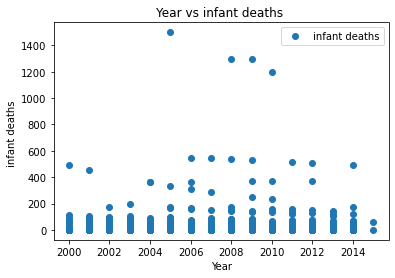

In [38]:
yr_all.plot(x='Year', y = 'infant deaths', style = 'o')  
plt.title('Year vs infant deaths ')
plt.xlabel('Year')
plt.ylabel('infant deaths ')
plt.show()

In [25]:
# Independent Variable
X = yr_all.iloc[:,:-1].values
y = yr_all.iloc[:, 1].values
y

array([   5,   38,    0,   71,    0,    0,   10,   76,    0,   19,    0,
         11,   32,   16,   54,    0,    1,    6,    1,    1,    0,    0,
          0,    3,    3,    1,    3,    5, 1200,   10,   13,    0,   28,
          1,   11,    3,   23,   19,    6,   32,    3,    1,    2,    0,
          3,   57,   11,    0,    0,    2,    4,   23,    1,   25,    3,
          0,   88,    4,    0,    0,    0,    0,    8,    4,  490,  159,
          1,    6,    6,    7,    1,    9,  104,   70,    0,   16,   46,
          0,    3,    3,   58,   31,   29, 1500,    7,    3,   11,   21,
         11,    0,    1,    2,    8,   41,    2,    9,    2,   10,    0,
         71,   31,    7,   16,   77,    1,    0,   26,   32,    6,    0,
         25,    1,   29,    0,   61,    4,   13,    0,    0,    2,   50,
          1,    2,    0,   32,    2,   20,    0,   47,    3,   12,    0,
          1,    0,    9,    4,   72,    0,   28,   53,    3,   18,    5,
          5,  505,    3,   30,    1,   32,   25,   

In [26]:
X

array([[2008],
       [2004],
       [2013],
       [2013],
       [2006],
       [2013],
       [2007],
       [2011],
       [2013],
       [2012],
       [2001],
       [2014],
       [2010],
       [2002],
       [2002],
       [2010],
       [2011],
       [2009],
       [2010],
       [2012],
       [2006],
       [2011],
       [2000],
       [2014],
       [2012],
       [2003],
       [2010],
       [2009],
       [2010],
       [2008],
       [2014],
       [2002],
       [2005],
       [2008],
       [2002],
       [2007],
       [2006],
       [2013],
       [2006],
       [2013],
       [2001],
       [2006],
       [2008],
       [2013],
       [2008],
       [2009],
       [2011],
       [2009],
       [2010],
       [2008],
       [2000],
       [2010],
       [2012],
       [2013],
       [2011],
       [2011],
       [2002],
       [2004],
       [2012],
       [2007],
       [2009],
       [2013],
       [2014],
       [2000],
       [2000],
       [2006],
       [20

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [28]:
X_test

array([[2013],
       [2005],
       [2006],
       [2014],
       [2001],
       [2004],
       [2008],
       [2008],
       [2007],
       [2008],
       [2013],
       [2000],
       [2013],
       [2012],
       [2009],
       [2002],
       [2012],
       [2001],
       [2009],
       [2012],
       [2011],
       [2011],
       [2001],
       [2004],
       [2013],
       [2008],
       [2009],
       [2004],
       [2011],
       [2003],
       [2006],
       [2006],
       [2002],
       [2004],
       [2010],
       [2009],
       [2006],
       [2009],
       [2012],
       [2010],
       [2010],
       [2000],
       [2001],
       [2008],
       [2012],
       [2003],
       [2000],
       [2008],
       [2007],
       [2011],
       [2010],
       [2009],
       [2014],
       [2005],
       [2010],
       [2011],
       [2003],
       [2014],
       [2012],
       [2007],
       [2013],
       [2003],
       [2011],
       [2010],
       [2002],
       [2008],
       [20

In [29]:
y_train

array([   1,    6,   20,   30,    2,    1,    5,    0,    2,   30,   12,
         27,   17,    1,  104,    0,   13,   16,   11,   32,   22,   28,
          0,    8,    6,    7,    3,    0,    1,    7,    0,    0,    1,
          3,    0,   42,    2,   69,   10,   22,  150,   54,    1,    0,
        109,   69,    0,    1,    0,    1,    7,   32,    0,    0,    1,
          1,    2,   10,    3,    3,   54,    1,    2,   18,    1,   10,
          0,   10,    0,    1,    1,   21,   25,    0,    1,   20,    6,
          1,  162,    2,   10,    0,   10,    0,    0,    2,    1,   69,
          0,    6,    2,   28,   29,    3,  103,   12,    1,    0,   14,
          5,    2,    5,    4,    4,  332,   71,    1,   87,   12,   19,
          1,    0,   12,    1,    2,    0,    3,    0,   14,    0,    0,
          2,   46,   75,    2,    0,    1,    0,    7,    1,   28,   50,
          3,    0,    2,   25,   81,    0,   25,    3,   19,    0,   82,
         40,    2,    3,    1,    0,    2,    0,   

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
print(reg.intercept_)

1166.7466934802476


In [32]:
print(reg.coef_)

[-0.56511886]


In [33]:
y_pred = reg.predict(X_test)

In [34]:
X_train.shape

(700, 1)

In [35]:
y_pred.shape

(300,)

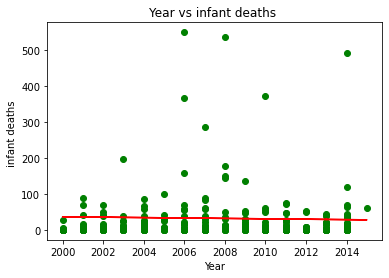

In [39]:
plt.scatter(X_test, y_test, color="green")   
plt.plot(X_test, y_pred, color="red") 
plt.title('Year vs infant deaths ')
plt.xlabel('Year')
plt.ylabel('infant deaths ')
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

In [ ]:
df